(model-data)=
# Daten modellieren

## Beispielfrage mündliche Prüfung

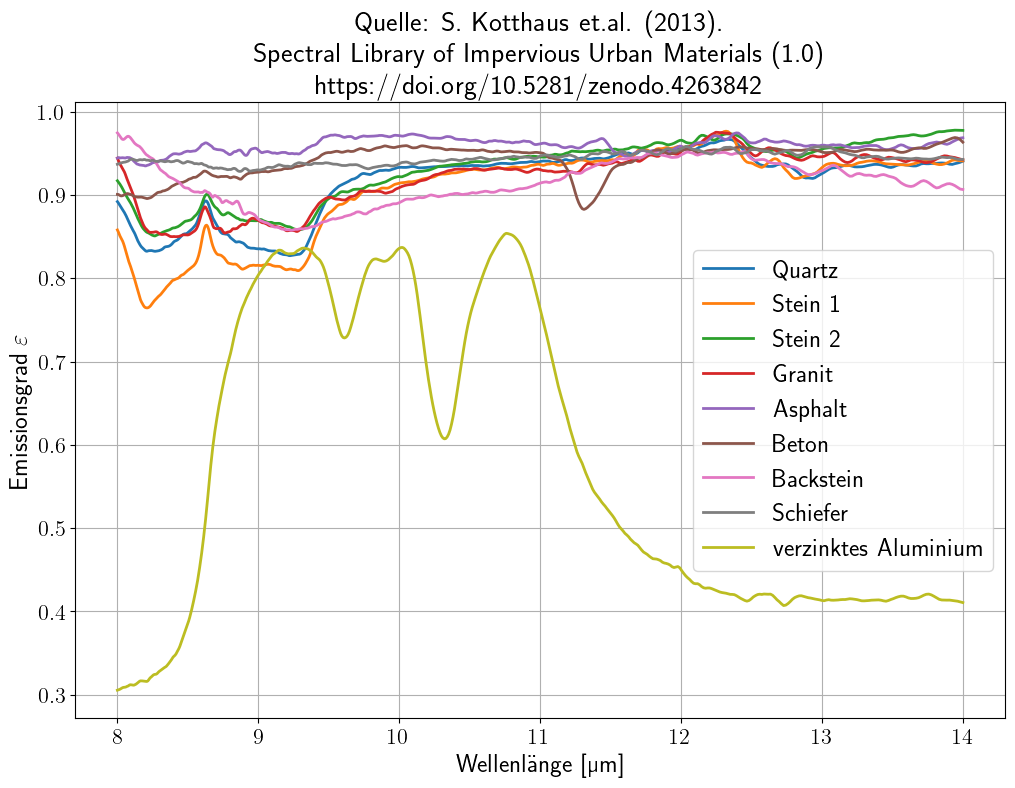

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import locale
from distutils.spawn import find_executable

plt.rcParams['savefig.dpi'] = 75
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 18
locale.setlocale(locale.LC_ALL, '')
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

if find_executable('latex'):
    plt.rcParams['text.usetex'] = True
    pd.set_option('display.latex.repr', True)
    pd.set_option('display.latex.longtable', True)

urban = pd.read_csv('https://zenodo.org/record/4263842/files/LUMA_SLUM_IR.csv?download=1')
urban.rename(columns = {'wavelength':'Wellenlänge [µm]',
                       'X001':'Quartz',
                       'S001':'Stein 1',
                       'S003':'Stein 2',
                       'G001':'Granit',
                       'A001':'Asphalt',
                       'C001':'Beton',
                       'B004':'Backstein',
                       'L002':'Schiefer',
                       'Z001':'verzinktes Aluminium'}, inplace = True)
urban.plot(figsize=(12,8),x='Wellenlänge [µm]', y=['Quartz','Stein 1','Stein 2','Granit','Asphalt','Beton',
                                    'Backstein','Schiefer','verzinktes Aluminium'],
          title = 'Quelle: S. Kotthaus et.al. (2013). \nSpectral Library of Impervious Urban Materials (1.0) \nhttps://doi.org/10.5281/zenodo.4263842')
plt.ylabel(r'Emissionsgrad $\varepsilon$')
plt.grid()
plt.show()

<div class="admonition important" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>Beispielfrage für mündliche Prüfung</b></div>
Was sehen wir hier? Was hat das mit Energieeffizienz zu tun? Was ist bei Messungen zu beachten?
</div>

## Aufgaben in diesem Kapitel

- [ ] [Referenzdatensatz aus Annahmen](gen-ref) erzeugen (jupyter notebook unter `files/08/SYE-generate-reference.ipynb`)
- [ ] [Annahmen aus Typenschildern](nameplate-model) ableiten
- [ ] [Überblick über energieeffiziente Haushaltsgeräte](appliances) erhalten
- [ ] [Strom und Scheinleistung nach Blindleistungskompensation oder Leistungsfaktorkorrektur](model-reactive-power-comp) modellieren (jupyter notebook unter `files/08/SYE-model-reactive-power-comp.ipynb`)
- [ ] [Auswirkungen von Teillast- und Volllastbetrieb mit Wirkungsgradkurven](efficiencycurve) modellieren (jupyter notebook zu finden in `files/08/SYE-efficiencycurve.ipynb`)
- [ ] [Lineare Regression](linearregression) nutzen, um Zwischenwerte zu schätzen (jupyter notebook unter `files/08/SYE-linearregression.ipynb`)

Aus zwei Gründen ist es notwendig, für Analysen Daten zu modellieren: Zum einen existieren häufig nur unvollständige Datensätze, d.h. punktuelle Messungen oder lückenhafte längerdauernde Messungen mit teilweise unpassenden Parametern. Um einen vollständigen Ist-Stand zu erzeugen, ist es nicht möglich Jahresmessungen nachzuholen. Abhilfe schafft die Modellierung des Ist-Standes. Zum anderen sind viele Energieeffizienzmaßnahmen vergleichsweise aufwendig in der Umsetzung. D.h. es ist besser, erst einmal in einer Berechnung mit einem entsprechend der Maßnahme veränderten Datensatz abzuschätzen, ob sich eine Maßnahme lohnt. D.h. auch Energieeffizienzmaßnahmen finden Eingang in modellierte Zeitreihen. Dieses Kapitel befasst sich damit, wie man solche Modelle auf einfache Weise umsetzen kann. Bewusst sind hier keine komplexen Energiesystemmodelle im Einsatz, da Kursteilnehmende in der Regel damit noch keine Erfahrung haben. Jedoch ist es für eine Vorstudie (=die Projektaufgabe) natürlich erlaubt, bereits vorhandene und bekannte Modelle einzusetzen, dort wo dies Sinn macht.

![Modellbildungsprozess](../img/modellbildungsprozess.png)